In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters
from math import sqrt
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
from scipy.spatial import distance_matrix
import glob
from skimage.filters import threshold_yen

In [2]:
import os 
my_list = glob.glob("*_scaled_*")

In [3]:
my_list [0]

'181004_Enriched_F1__00003_scaled_aligned'

In [4]:
img = cv2.imread('./181004_Enriched_F1__00003_scaled_aligned/meanim_slice_thresh_1_00001.tif')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [5]:
gauss = filters.gaussian(gray, sigma = 1)

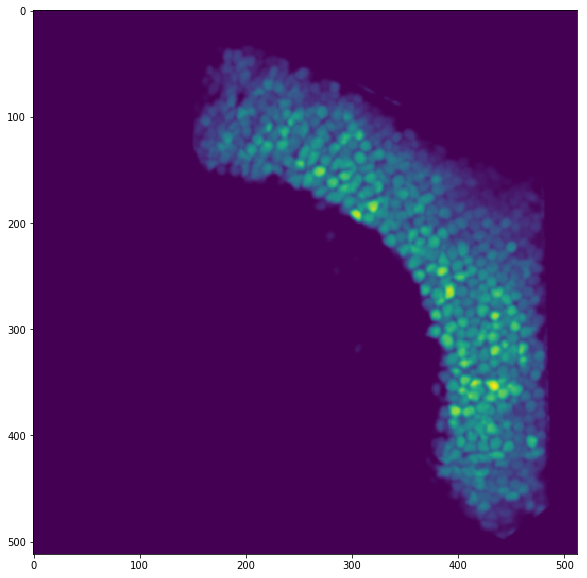

In [6]:
plt.figure(figsize = (10,10))
plt.imshow(gauss)

In [7]:
def count_cells(path, prefix):
    counts = np.zeros((1, 5))
    for i in range(5):
        img = cv2.imread(path + prefix + "/meanim_slice_" + str(i +1) + "_00001.tif")
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        gauss = filters.gaussian(gray, sigma = 1)
        #gauss [(gauss > threshold_yen(gauss)) == 0] = 0
        blobs_log = blob_log(gauss, min_sigma =1.5, max_sigma=4, num_sigma=50, threshold=0.001, overlap=0.1)
        print(str(i))
        counts [0] [i] =  blobs_log.shape [0]
        np.savetxt(X=counts, fname=path + prefix+ "/" + prefix +"_cell_counts.txt")
    return([[counts], np.sum(counts)])

In [8]:
counts = count_cells(path = "./",prefix = "181004_Enriched_F1__00003_scaled_aligned")

0
1
2
3
4


In [9]:
counts

[[array([[ 719.,  920., 1104., 1251., 1193.]])], 5187.0]

In [10]:
from skimage.filters import try_all_threshold
img = gauss 

In [11]:
blobs_log = blob_log(gauss, min_sigma =1.5, max_sigma=4, num_sigma=50, threshold=0.001, overlap=0.1)

In [12]:
path + prefix + "meanim_slice_" + str(i +1) + "_00001.tif"

NameError: name 'path' is not defined

In [ ]:
plt.figure(figsize = (20,20))
fig, ax = try_all_threshold(gray, figsize=(20, 20), verbose=False)
plt.show()

In [ ]:
gauss [ (gauss > threshold_yen(gauss)) == 0] = 0

In [ ]:
plt.imshow(gauss, vmax = 0.2)

In [13]:
def overlay_blobs(slice_im, blobs_log ):
    fig, ax = plt.subplots(figsize=(20, 20), sharex=True, sharey=True)
    ax.imshow(gauss, interpolation='nearest')
    blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)
    for i in range(blobs_log.shape[0]):
        y, x, r = blobs_log [i,]
        c = plt.Circle((x, y), r, color="yellow", linewidth=1, fill=False)
        ax.add_patch(c)
    print(blobs_log.shape [0])


567


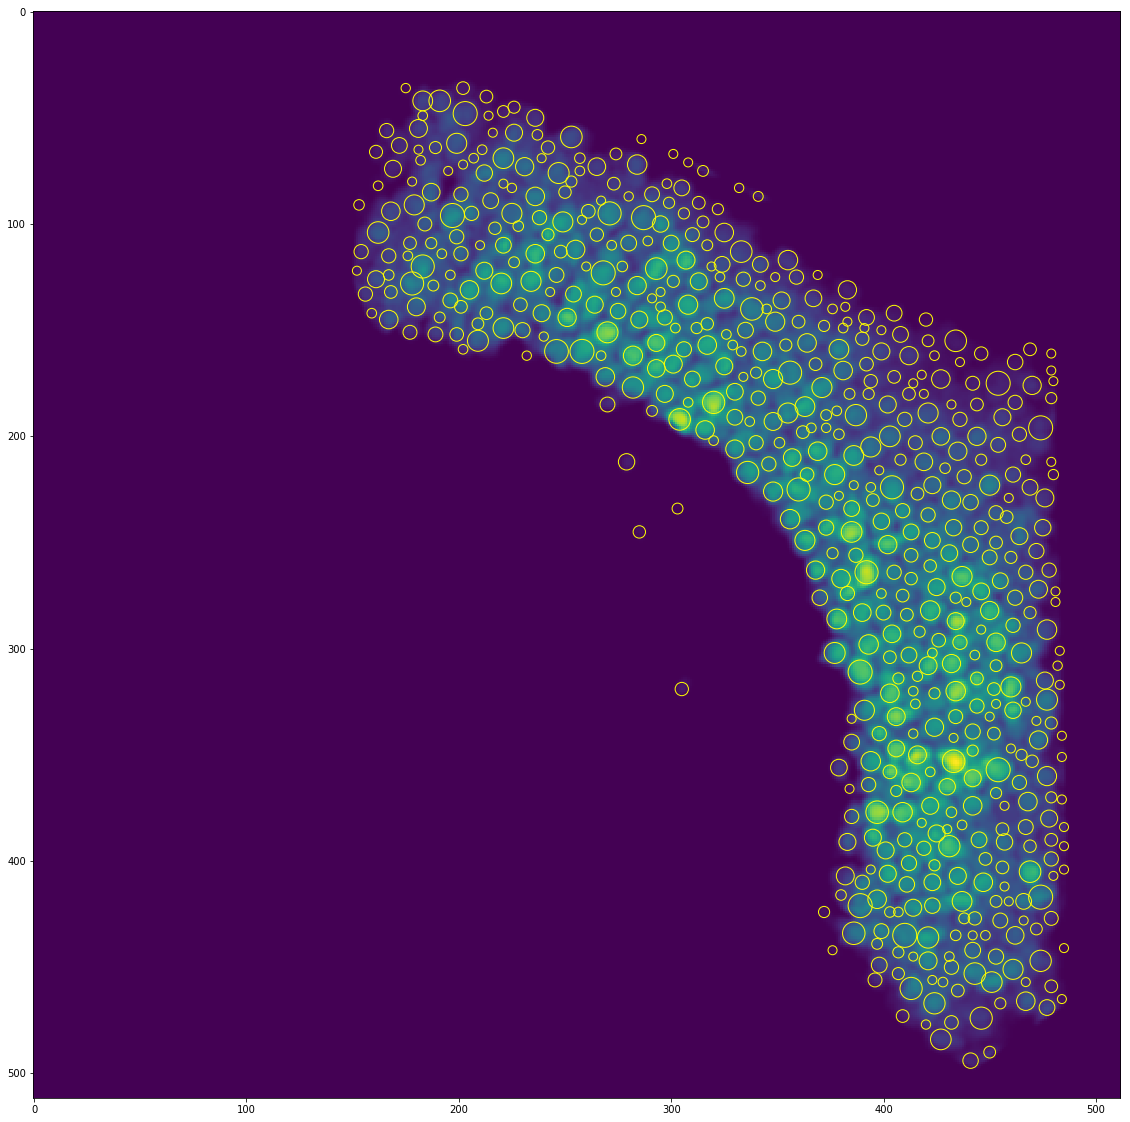

In [14]:
overlay_blobs(slice_im = gauss, blobs_log = blobs_log)

567


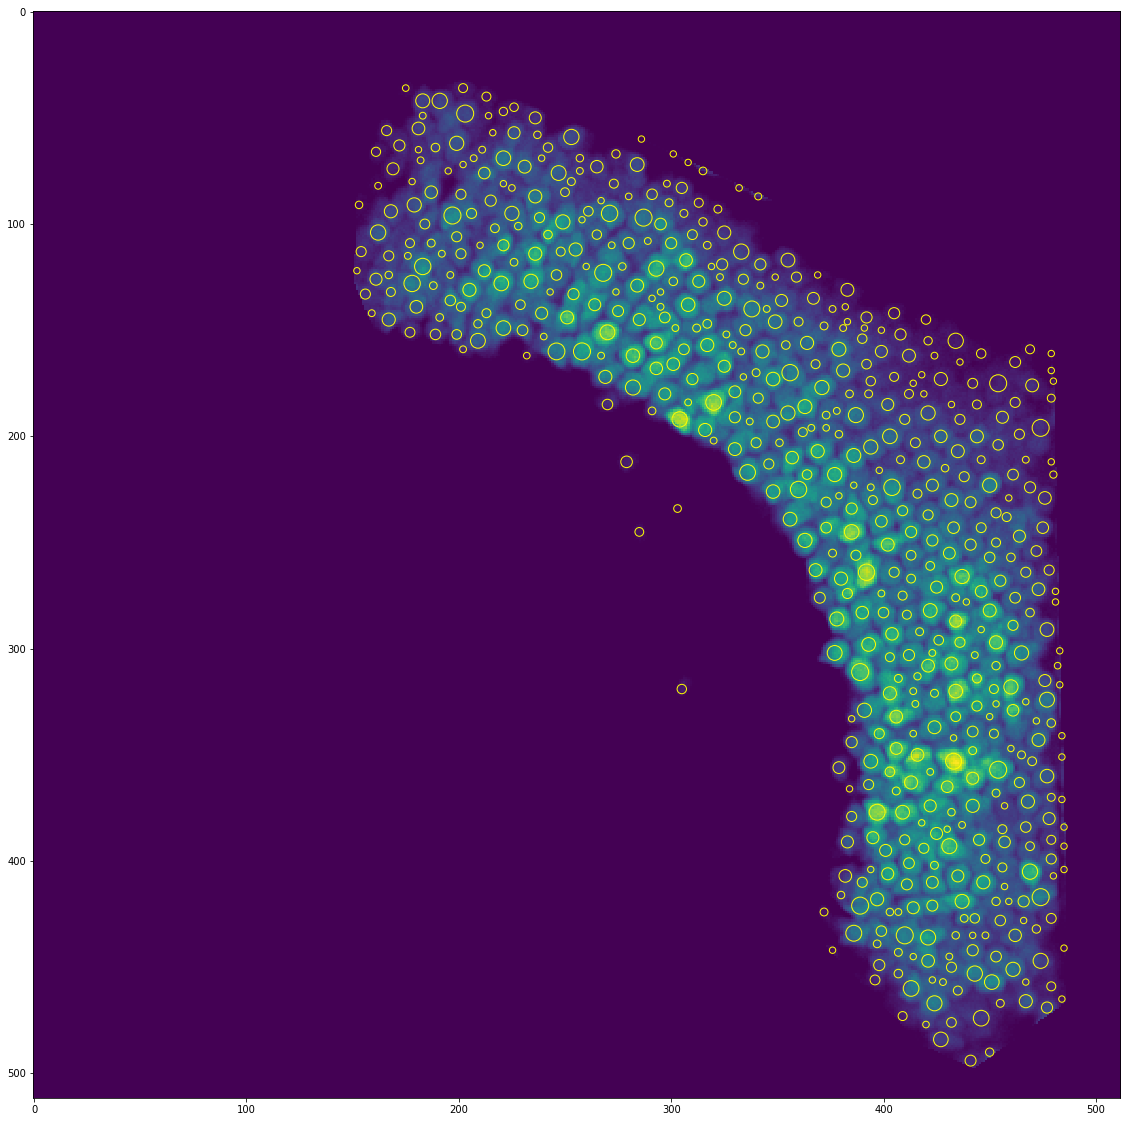

In [15]:
blobs_log = blob_log(gauss, min_sigma =1.5, max_sigma=4, num_sigma=50, threshold=0.001, overlap=0.1)

fig, ax = plt.subplots(figsize=(20, 20), sharex=True, sharey=True)


ax.imshow(gray, interpolation='nearest')
for i in range(blobs_log.shape[0]):
    y, x, r = blobs_log [i,]
    c = plt.Circle((x, y), r, color="yellow", linewidth=1, fill=False)
    ax.add_patch(c)
print(blobs_log.shape [0])

In [16]:
blobs_log = blob_log(gauss, min_sigma =2, max_sigma=4, num_sigma=2, threshold=0.001, overlap=0.1)

IndexError: arrays used as indices must be of integer (or boolean) type

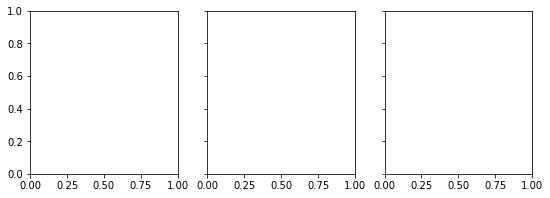

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()
blobs_list = [blobs_log, blobs_log]


for idx in enumerate(blobs_list):
    ax[idx].imshow(gauss, interpolation='nearest')
    for blob in blobs_log:
        y, x, r = blobs_log
        c = plt.Circle((x, y), r, color="yellow", linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

In [18]:
enumerate(blobs_log)

In [20]:
idx

(0, array([[494., 441.,   2.],
        [490., 450.,   2.],
        [484., 428.,   4.],
        ...,
        [ 40., 192.,   2.],
        [ 36., 202.,   2.],
        [ 36., 175.,   2.]]))